###                **Student Grade Prediction using Machine Learning**

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
MAE: 1.1050632911392408
R² Score: 0.8299569015097052


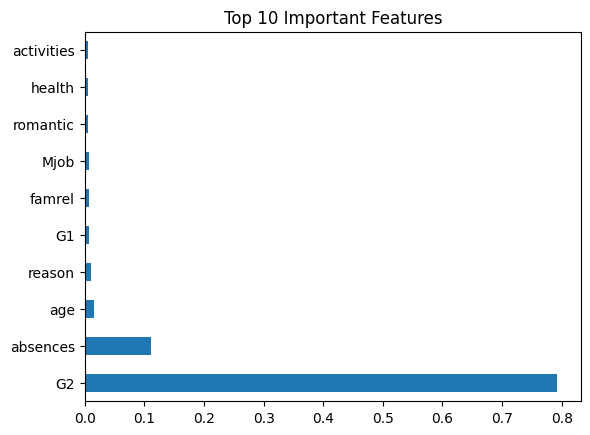

In [4]:
# 1. Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 2. Load Dataset
data = pd.read_csv("student-mat.csv", sep=";")  # Download from UCI and place in same folder
print(data.head())

# 3. Encode Categorical Columns
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

# 4. Feature Selection
X = data.drop("G3", axis=1)  # G3 = final grade
y = data["G3"]

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Predict & Evaluate
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 8. Feature Importance Plot
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()




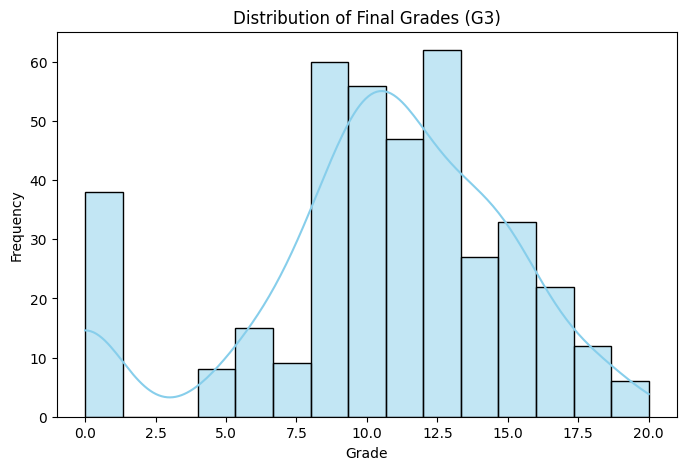

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(data['G3'], kde=True, bins=15, color='skyblue')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

<ipython-input-6-229951c2cbfb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=data, palette='viridis')


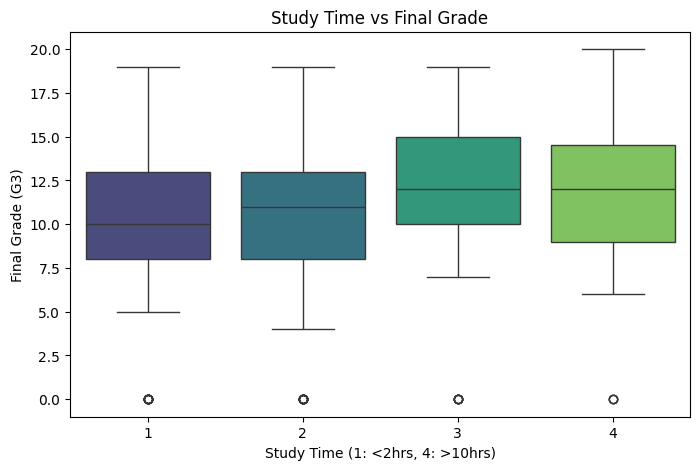

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='studytime', y='G3', data=data, palette='viridis')
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time (1: <2hrs, 4: >10hrs)")
plt.ylabel("Final Grade (G3)")
plt.show()


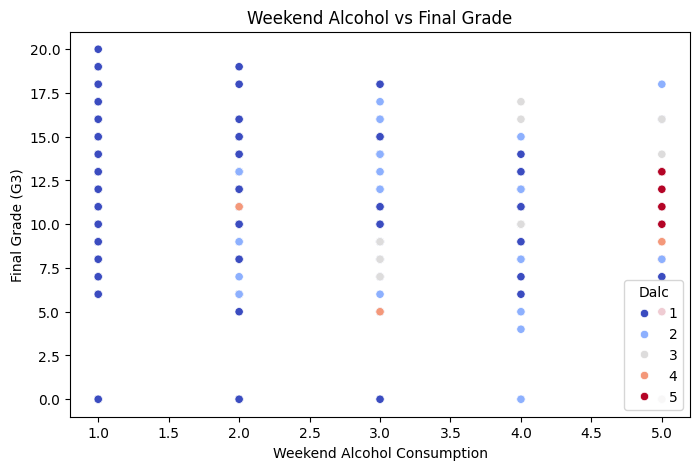

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Walc', y='G3', data=data, hue='Dalc', palette='coolwarm')
plt.title("Weekend Alcohol vs Final Grade")
plt.xlabel("Weekend Alcohol Consumption")
plt.ylabel("Final Grade (G3)")
plt.show()


<ipython-input-8-647325debf7c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='magma')


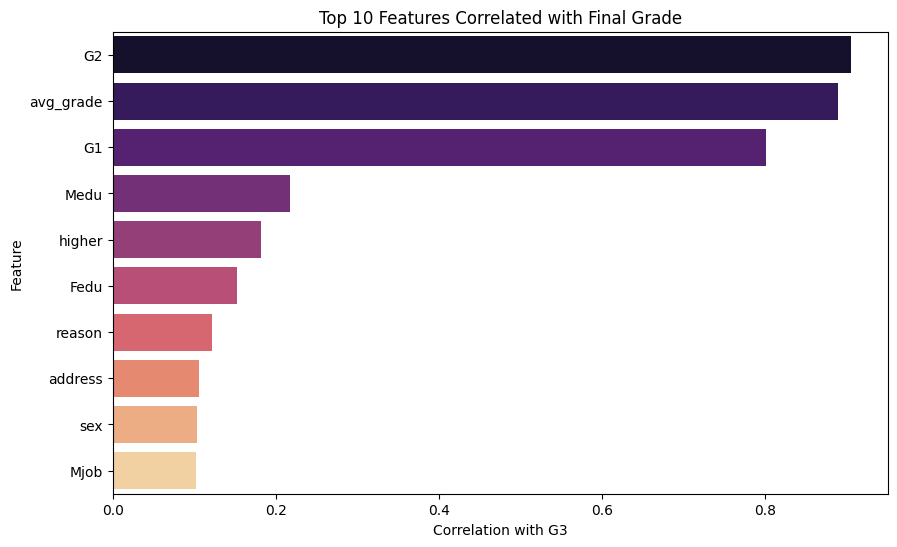

In [8]:
# Only show features most relevant to G3
corr = data.corr()
top_features = corr['G3'].sort_values(ascending=False)[1:11]  # Top 10 (excluding G3 itself)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='magma')
plt.title("Top 10 Features Correlated with Final Grade")
plt.xlabel("Correlation with G3")
plt.ylabel("Feature")
plt.show()


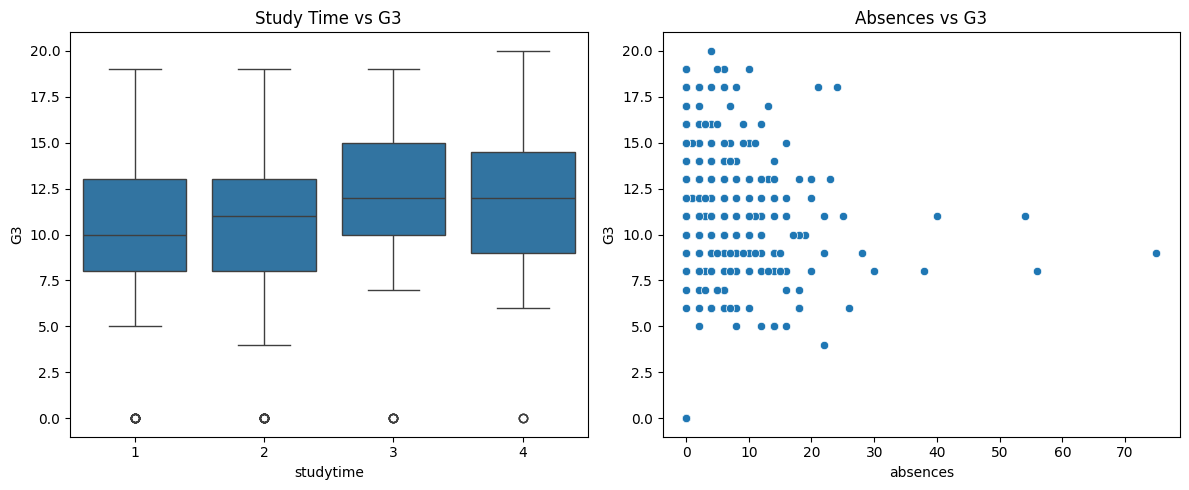

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x='studytime', y='G3', data=data, ax=axs[0])
axs[0].set_title("Study Time vs G3")

sns.scatterplot(x='absences', y='G3', data=data, ax=axs[1])
axs[1].set_title("Absences vs G3")

plt.tight_layout()
plt.show()
